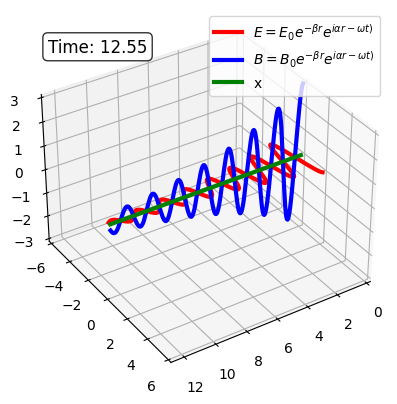

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings("ignore")

t = np.arange(0, 4 * np.pi, 0.05)
phi = np.pi
Emax = 2
Bmax = 3
omega = 4
lambda_val = 4000
i = 1j
r = np.linspace(0, 0.4, len(t))
beta = 5
alpha = 5
Ey = Emax * np.exp(-beta * r) * np.exp(i * (alpha * r - omega * t))
Bz = Bmax * np.exp(-beta * r) * np.exp(i * (alpha * r - omega * t))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Yline, = ax.plot([], [], [], linewidth=3, color='r', label=r'$E=E_0 e^{-\beta r} e^{i\alpha r -\omega t)}$')
Zline, = ax.plot([], [], [], linewidth=3, color='b', label=r'$B=B_0 e^{-\beta r} e^{i\alpha r -\omega t)}$')
Xline, = ax.plot([], [], [], linewidth=3, color='g', label='x')
ax.set_xlim(0, 4 * np.pi)
ax.set_ylim(-6, 6)
ax.set_zlim(-3, 3)
ax.view_init(34, 57)

# Create a bounding box to enclose the text
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8)
textbox = ax.text(0.05,0.95,47, '', transform=ax.transAxes, fontsize=12, bbox=bbox_props)

# Create a custom legend
ax.legend(loc='upper right', fontsize=10)

def update(i):
    Xline.set_data(t[:i], np.zeros(i))
    Xline.set_3d_properties(np.zeros(i))
    Yline.set_data(t[:i], Ey[:i])
    Yline.set_3d_properties(np.zeros(i))
    Zline.set_data(t[:i], np.zeros(i))
    Zline.set_3d_properties(Bz[:i])

    # Update the time text
    time_text = ('Time: {:.2f}'.format(t[i]))
    full_text = f"{time_text}"
    textbox.set_text(full_text)

    return Xline, Yline, Zline, textbox

from IPython.display import HTML

# Create the animation and save it as a HTML5 video
ani = FuncAnimation(fig, update, frames=len(t), interval=20, blit=True)
ani.save('animation.html', writer='html')

# Display the HTML5 video in the notebook
HTML('animation.html')